## This is the video game sales assignment - David Smith
data: https://www.kaggle.com/gregorut/videogamesales

In [1]:
import csv

### first, process the data

In [2]:
data = {}
with open('vgsales.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for i, row in enumerate(reader):
        if i > 0:
            try:
                entry = {'name': row[1], 'platform': row[2], 'year': int(row[3]), 'genre': row[4], 'publisher': row[5], 'na_sales': float(row[6]), 'eu_sales': float(row[7]), 'jp_sales': float(row[8]), 'other_sales': float(row[9]), 'global_sales': float(row[10])}
                data[row[0]] = entry
            except: pass
        else:
            print(row) # show us the column titles

['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


### Find the mode of publisher

In [3]:
from collections import Counter

#### check our data structure

In [4]:
data['4760']

{'eu_sales': 0.16,
 'genre': 'Action',
 'global_sales': 0.41,
 'jp_sales': 0.0,
 'na_sales': 0.21,
 'name': 'Naughty Bear',
 'other_sales': 0.04,
 'platform': 'X360',
 'publisher': '505 Games',
 'year': 2010}

In [5]:
publishers = [data[entry]['publisher'] for entry in data]
counter = Counter(publishers)
max_count = max(counter.values())
mode = ([k for k,v in counter.items() if v == max_count], max_count)

#### aha!

In [6]:
mode
counter.most_common()[:5]

[('Electronic Arts', 1339),
 ('Activision', 952),
 ('Namco Bandai Games', 927),
 ('Ubisoft', 915),
 ('Konami Digital Entertainment', 820)]

### Next, find mode of platform

In [7]:
max_count = max(Counter([data[entry]['platform'] for entry in data]).values())

In [8]:
mode_platform = ([k for k,v in Counter([data[entry]['platform'] for entry in data]).items() if v == max_count], max_count)
Counter([data[entry]['platform'] for entry in data]).most_common()[:5]

[('PS2', 2110), ('DS', 2107), ('PS3', 1298), ('Wii', 1282), ('X360', 1228)]

#### aha!

In [9]:
mode_platform

(['PS2'], 2110)

### and the same for genre

In [10]:
max_count = max(Counter([data[entry]['genre'] for entry in data]).values())

In [11]:
mode_genre = ([k for k,v in Counter([data[entry]['genre'] for entry in data]).items() if v == max_count], max_count)
Counter([data[entry]['genre'] for entry in data]).most_common()[:5]

[('Action', 3232),
 ('Sports', 2298),
 ('Misc', 1688),
 ('Role-Playing', 1463),
 ('Shooter', 1268)]

#### like magic!

In [12]:
mode_genre

(['Action'], 3232)

### For North American video game sales, what’s the median?

In [13]:
list_of_sales = sorted([(data[entry]['name'], data[entry]['na_sales'], data[entry]['global_sales']) for entry in data], key=lambda x: x[1])

In [14]:
median_index = int(len(list_of_sales) / 2)
median_na = list_of_sales[median_index]
print('median NA sales:', median_na[0], median_na[1], 'million copies sold')

median NA sales: Midnight Mysteries: The Edgar Allan Poe Conspiracy 0.08 million copies sold


### For the top-selling game of all time, how many standard deviations above/below the mean are its sales for North America?

#### first, let's find the std. deviation

In [15]:
mean_na_sales = sum([item[1] for item in list_of_sales]) / len(list_of_sales)
print(mean_na_sales)

0.26650808342589277


#### this data is a bit messy

In [16]:
for index,i in enumerate(list_of_sales):
    if list_of_sales[index][1] > 42:
        print(list_of_sales[index], index)
        list_of_sales.pop(index)
        index -= 1

In [17]:
max([i[1] for i in list_of_sales])

41.49

In [18]:
std_dev_na = (sum((item[1] - mean_na_sales) ** 2 for item in list_of_sales) / len(list_of_sales)) ** 0.5

In [19]:
std_dev_na

0.8244171420567773

In [20]:
(41.49 - mean_na_sales) / std_dev_na

50.00319597155473

# now with NumPy!

In [21]:
import numpy as np
# the converters fixes a unicode decod error that was plagueing me!
np.genfromtxt('vgsales.csv', delimiter=',', unpack=True, dtype='U20', invalid_raise=False, skip_header= 1, converters={0: lambda x: int(x), 1:lambda x: x.decode('utf8'), 2: lambda x: int(x)})

/home/david/codefellows/501/ENV/lib/python3.5/site-packages/numpy/lib/npyio.py:1772: ConversionWarning: Some errors were detected !
    Line #945 (got 12 columns instead of 11)
    Line #1093 (got 12 columns instead of 11)
    Line #1628 (got 12 columns instead of 11)
    Line #1835 (got 14 columns instead of 11)
    Line #2411 (got 12 columns instead of 11)
    Line #2890 (got 12 columns instead of 11)
    Line #2920 (got 13 columns instead of 11)
    Line #3051 (got 12 columns instead of 11)
    Line #3091 (got 14 columns instead of 11)
    Line #3218 (got 13 columns instead of 11)
    Line #3329 (got 14 columns instead of 11)
    Line #3413 (got 14 columns instead of 11)
    Line #3465 (got 13 columns instead of 11)
    Line #3525 (got 12 columns instead of 11)
    Line #3552 (got 2 columns instead of 11)
    Line #3573 (got 12 columns instead of 11)
    Line #3758 (got 12 columns instead of 11)
    Line #3906 (got 13 columns instead of 11)
    Line #3913 (got 13 columns instead of 

array([ (1, '', None, '2006', 'Sports', 'Nintendo', '41.49', '29.02', '3.77', '8.46', '82.74'),
       (2, '', None, '1985', 'Platform', 'Nintendo', '29.08', '3.58', '6.81', '0.77', '40.24'),
       (3, '', None, '2008', 'Racing', 'Nintendo', '15.85', '12.88', '3.79', '3.31', '35.82'),
       ...,
       (16598, '', None, '2008', 'Racing', 'Activision', '0', '0', '0', '0', '0.01'),
       (16599, '', None, '2010', 'Puzzle', '7G//AMES', '0', '0.01', '0', '0', '0.01'),
       (16600, '', None, '2003', 'Platform', 'Wanadoo', '0.01', '0', '0', '0', '0.01')], 
      dtype=[('f0', '<i8'), ('f1', '<U'), ('f2', 'O'), ('f3', '<U20'), ('f4', '<U20'), ('f5', '<U20'), ('f6', '<U20'), ('f7', '<U20'), ('f8', '<U20'), ('f9', '<U20'), ('f10', '<U20')])

In [22]:
# gah continue later, screw this for now!

- Show a scatter of Nintendo’s sales across all regions for each year.  Make each region a different color.

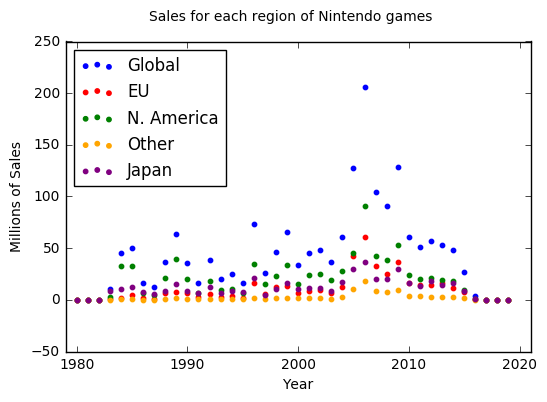

In [23]:
dates = [data[entry]['year'] for entry in data]
x = np.array(range(min(dates), max(dates)))
y_global, y_eu, y_na, y_other, y_jp = [], [], [], [], []

for year in x:
    sales_global, sales_eu, sales_na, sales_other, sales_jp = 0, 0, 0, 0, 0
    for entry in data:
        if (data[entry]['year'] == year) & (data[entry]['publisher'] == 'Nintendo'):
            sales_global += data[entry]['global_sales']
            sales_eu += data[entry]['eu_sales']
            sales_na += data[entry]['na_sales']
            sales_other += data[entry]['other_sales']
            sales_jp += data[entry]['jp_sales']
    y_global.append(sales_global)
    y_eu.append(sales_eu)
    y_na.append(sales_na)
    y_other.append(sales_other)
    y_jp.append(sales_jp)

import matplotlib.pyplot as plt

plt.scatter(x, y_global, s=10, color='blue', label='Global')
plt.scatter(x, y_eu, s=10, color='red', label='EU')
plt.scatter(x, y_na, s=10, color='green', label='N. America')
plt.scatter(x, y_other, s=10, color='orange', label='Other')
plt.scatter(x, y_jp, s=10, color='purple', label='Japan')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Millions of Sales')
plt.suptitle('Sales for each region of Nintendo games')
plt.xlim(1979, 2021)
plt.show()

- Show a scatter of North American sales vs. European sales for the top 10,000 games. Color-code them by genre.
- Show a scatter of total Global sales per year

In [24]:
x = [range(1,10001)]
